<a href="https://colab.research.google.com/github/arkadev658/Image-identification/blob/main/vgg16_finalised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#necessary modules
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#training and testing file path for both debris and rebar is defined
train_path='/content/drive/MyDrive/Colab Notebooks/tensorflow/new_updated_data/training_set'
valid_path='/content/drive/MyDrive/Colab Notebooks/tensorflow/new_updated_data/test_set'
test_path='/content/drive/MyDrive/Colab Notebooks/tensorflow/cementitiousDebris/check'

In [ ]:
#target image size (in 2D)
IMAGE_SIZE=[200,200]

In [ ]:
#TRAIN,TEST,VLIDATION image files
image_files=glob(train_path+'/*/*.png')
valid_image_files=glob(valid_path+'/*/*.png')
test_image_files=glob(test_path+'/*/*.png')

In [ ]:
#no of training images
len(image_files)

171

In [ ]:
#no of folders=no of classses here debris ehich is folder[0] is markes as 0 and rebars are marked as 1
folders=glob(train_path+'/*')
folders

['/content/drive/MyDrive/Colab Notebooks/tensorflow/new_updated_data/training_set/debris_train',
 '/content/drive/MyDrive/Colab Notebooks/tensorflow/new_updated_data/training_set/rebars_train']

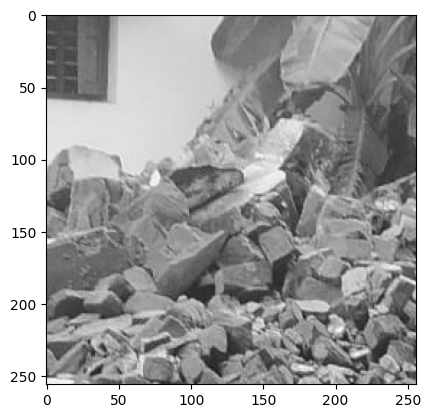

In [ ]:
#sanity checking
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
#including pretrained vgg16 model
ptm = PretrainedModel(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False) #+3 in image size is given for rgb layer as vgg16 works only with color images

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#restricting the training of the top cnn portion's weights
ptm.trainable=False

In [ ]:
K=len(folders)
#flattening image for Dense layer input
x=Flatten()(ptm.output)
#classification layer with two neurons
x=Dense(K,activation='softmax')(x)

**upto this point**

In [ ]:
#creating model
model=Model(inputs=ptm.input,outputs=x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
#data augmentation
gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [ ]:
#for test images
gen_test=ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
batch_size=128
#implimentation of augmentation
train_generator=gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)
valid_generator=gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)
test_generator=gen_test.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)

Found 171 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
#compiling model, categorical crossentropy is used as input labels are one-hot encoded
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from logging import StringTemplateStyle
r=model.fit(train_generator,validation_data=valid_generator,
                      epochs=25,steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
                      validation_steps=int(np.ceil(len(valid_image_files)/batch_size))) 

Epoch 1/25
2/2 [==============================] - 36s 15s/step - loss: 4.9498 - accuracy: 0.5029 - val_loss: 1.9997 - val_accuracy: 0.7667
Epoch 2/25
2/2 [==============================] - 3s 2s/step - loss: 1.8719 - accuracy: 0.8538 - val_loss: 3.9135 - val_accuracy: 0.7000
Epoch 3/25
2/2 [==============================] - 3s 2s/step - loss: 1.8165 - accuracy: 0.8772 - val_loss: 2.4910 - val_accuracy: 0.8000
Epoch 4/25
2/2 [==============================] - 3s 1s/step - loss: 0.4557 - accuracy: 0.9415 - val_loss: 1.2699 - val_accuracy: 0.9000
Epoch 5/25
2/2 [==============================] - 3s 2s/step - loss: 0.5335 - accuracy: 0.9766 - val_loss: 2.5015 - val_accuracy: 0.8000
Epoch 6/25
2/2 [==============================] - 3s 2s/step - loss: 0.6368 - accuracy: 0.9357 - val_loss: 1.5966 - val_accuracy: 0.8667
Epoch 7/25
2/2 [==============================] - 3s 756ms/step - loss: 0.4893 - accuracy: 0.9708 - val_loss: 1.5622 - val_accuracy: 0.9000
Epoch 8/25
2/2 [====================

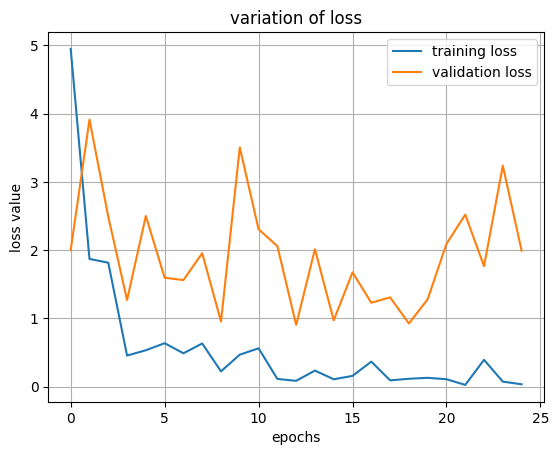

In [ ]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss');
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.title('variation of loss')
plt.legend();

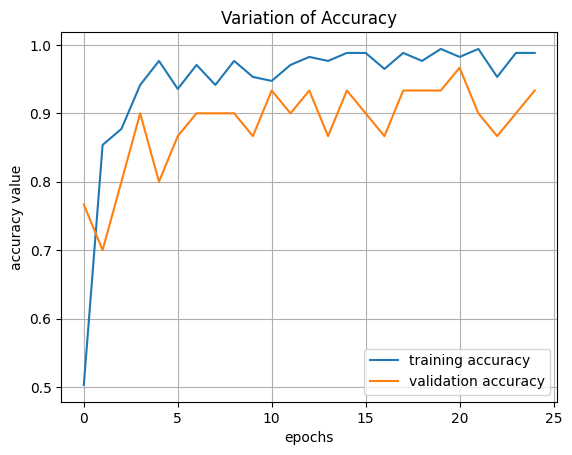

In [ ]:
plt.plot(r.history['accuracy'],label='training accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.grid()
plt.xlabel("epochs")
plt.ylabel("accuracy value")
plt.title('Variation of Accuracy')
plt.legend();

In [ ]:
#prediction on validation set (argmax is taken as softmax will give prob of two classes and we are taking max out of them)
y_predicted=model.predict(valid_generator).argmax(axis=1)

1/1 [==============================] - 0s 492ms/step


In [ ]:
#validation accuracy and loss
score=model.evaluate(valid_generator)
print(score)

1/1 [==============================] - 0s 448ms/step - loss: 1.7235 - accuracy: 0.9000
[1.7234666347503662, 0.8999999761581421]


In [ ]:
#comparison by taking one instance of data augmentation
a=next(valid_generator)
y_predicted=model.predict(a[0]).argmax(axis=1)
y_original=a[1].argmax(axis=1)


1/1 [==============================] - 0s 157ms/step


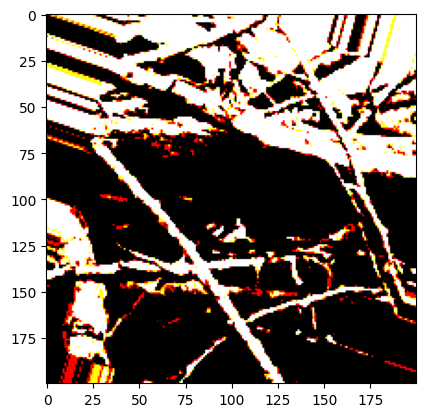

In [ ]:
#checking sanity
plt.imshow(next(valid_generator)[0][1]);

In [ ]:
#checking sanity
print(y_original)
print(y_predicted)

[0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0]
[0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_original,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
#dataframe for comparison
df_out=pd.DataFrame(zip(y_original,y_predicted),columns=['original','predicted'])

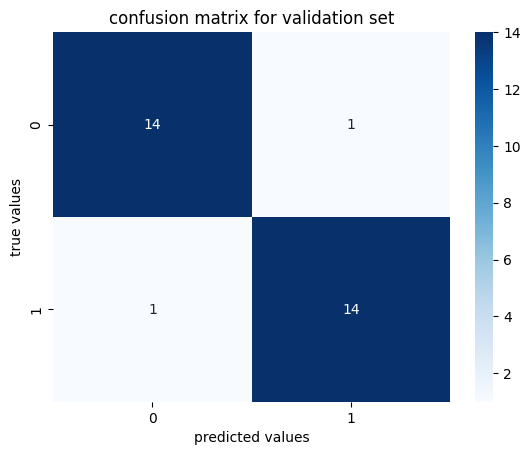

In [ ]:
#visualisation using confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix for validation set");

In [ ]:
#labeling
my_dict={0:'debris',1:'rebars'}

 predicted level=rebars	original level=debris


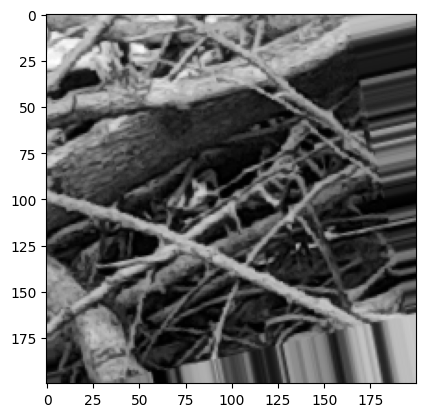

 predicted level=debris	original level=rebars


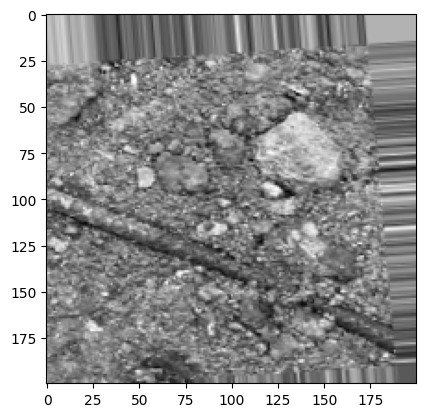

In [ ]:
#checking misclassified image
import tensorflow as tf
plt.gray()
misclassified_index=np.where(df_out['original']!=df_out['predicted'])[0]
for i in misclassified_index:
  print(f'\033[92m predicted level={my_dict[y_predicted[i]]}\toriginal level={my_dict[y_original[i]]}')
  plt.imshow(tf.image.rgb_to_grayscale(a[0][i]))
  plt.show();

**please input the image in any of the file in /content/drive/MyDrive/Colab Notebooks/tensorflow/cementitiousDebris/check**

Found 6 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


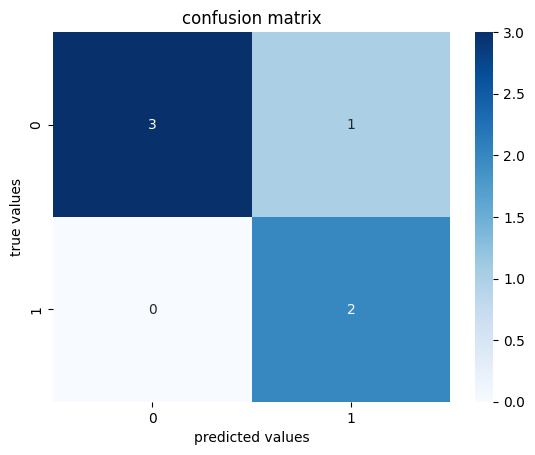

In [ ]:
#to check random input
test_generator=gen_test.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)
b=next(test_generator)
y_predicted=model.predict(b[0]).argmax(axis=1)
y_original=b[1].argmax(axis=1)
df_out=pd.DataFrame(zip(y_original,y_predicted),columns=['original','predicted'])
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

In [ ]:
no_of_images=len(b[1])

 predicted level=rebars	original level=rebars


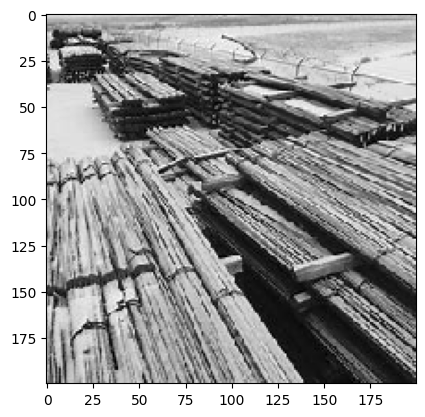

 predicted level=rebars	original level=rebars


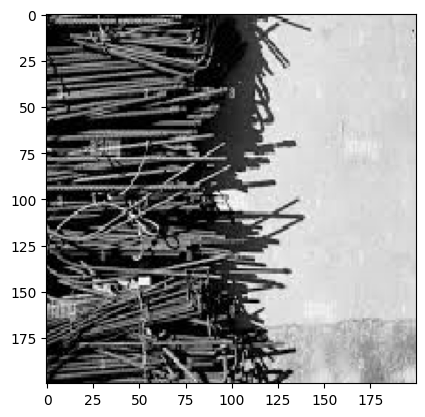

 predicted level=rebars	original level=debris


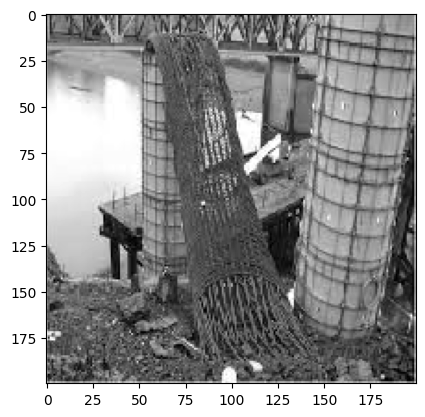

 predicted level=debris	original level=debris


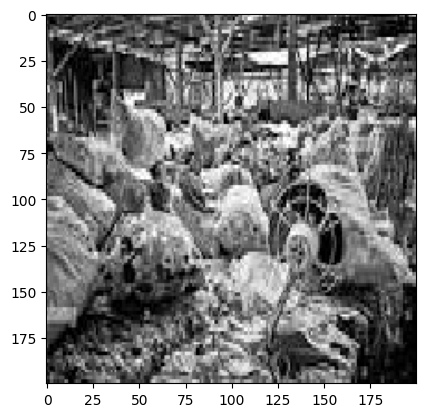

 predicted level=debris	original level=debris


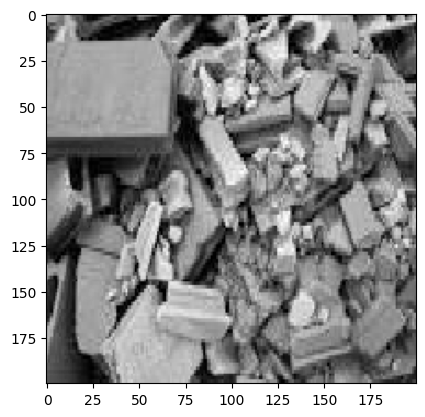

 predicted level=debris	original level=debris


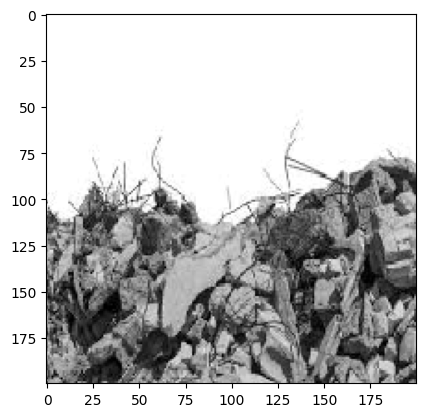

In [ ]:
import tensorflow as tf
for i in range(no_of_images):
  if(y_predicted[i]==y_original[i]):
    print(f'\033[92m predicted level={my_dict[y_predicted[i]]}\toriginal level={my_dict[y_original[i]]}')
  else:
    print(f'\033[91m predicted level={my_dict[y_predicted[i]]}\toriginal level={my_dict[y_original[i]]}')
  plt.imshow(tf.image.rgb_to_grayscale(b[0][i]))
  plt.show();

#we can see even if we give a wrong label machine identifies the correct label

In [ ]:
import os.path
if os.path.isfile('models/cnn_model_vgg16.h5') is False:
  model.save('models/cnn_model_vgg16')

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('/content/models/cnn_model_vgg16')

In [ ]:
#saving our model
#torch.save(model,'cnn_rev_1.pth')

In [ ]:
#loading our model
#import torch
#model1=torch.load('/content/drive/MyDrive/cnn_rev_1.pth')

****please input the image in any of the file in /content/drive/MyDrive/Colab Notebooks/tensorflow/cementitiousDebris/check****

In [ ]:
test_path='/content/drive/MyDrive/Colab Notebooks/tensorflow/cementitiousDebris/check'
test_image_files=glob(test_path+'/*/*.png')

Found 6 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step


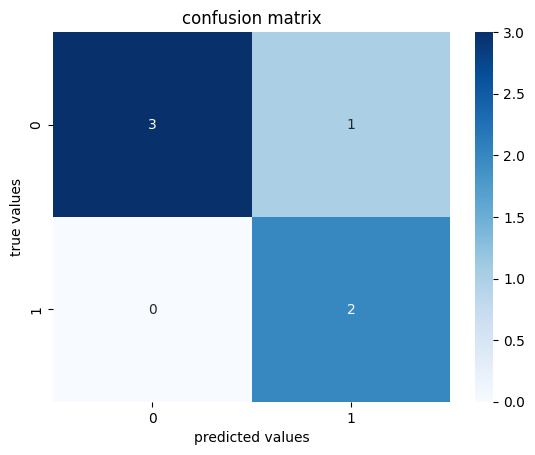

In [ ]:
test_generator=gen_test.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)
b=next(test_generator)
y_predicted=model.predict(b[0]).argmax(axis=1)
y_original=b[1].argmax(axis=1)
df_out=pd.DataFrame(zip(y_original,y_predicted),columns=['original','predicted'])
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

 predicted level=rebars	original level=debris


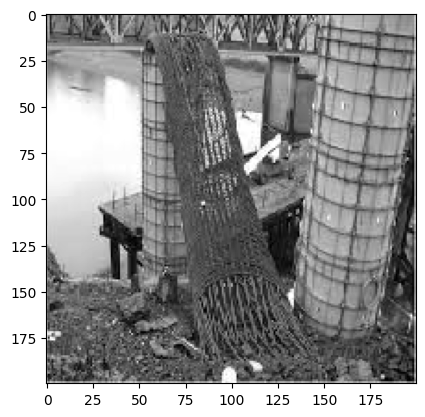

 predicted level=debris	original level=debris


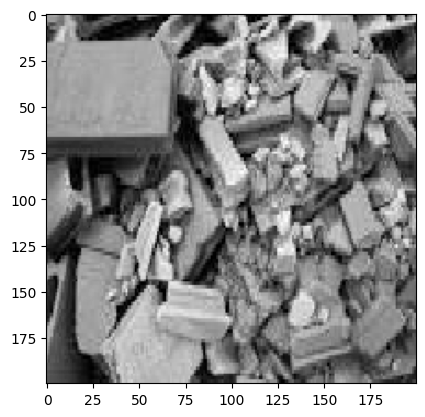

 predicted level=rebars	original level=rebars


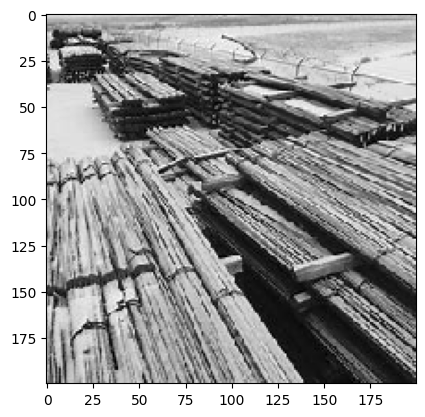

 predicted level=rebars	original level=rebars


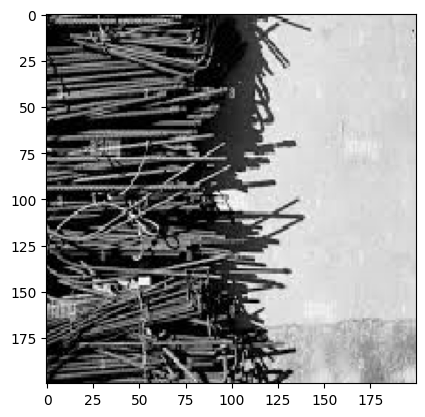

 predicted level=debris	original level=debris


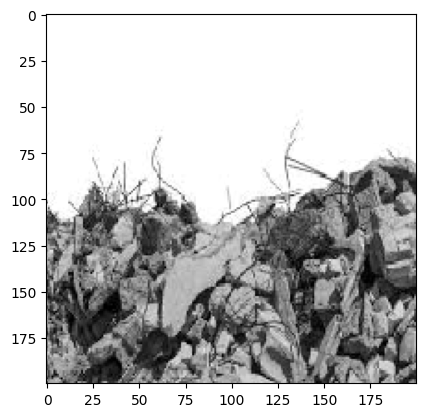

 predicted level=debris	original level=debris


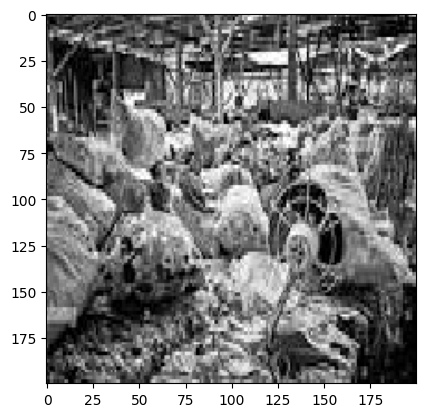

In [ ]:
my_dict={0:'debris',1:'rebars'}
import tensorflow as tf
for i in range(no_of_images):
  if(y_predicted[i]==y_original[i]):
    print(f'\033[92m predicted level={my_dict[y_predicted[i]]}\toriginal level={my_dict[y_original[i]]}')
  else:
    print(f'\033[91m predicted level={my_dict[y_predicted[i]]}\toriginal level={my_dict[y_original[i]]}')
  plt.imshow(tf.image.rgb_to_grayscale(b[0][i]))
  plt.show();

#we can see even if we give a wrong label machine identifies the correct label
